<center><h2><span style="font-family:cursive; color:#197954">What is classification ? </span></h2></center>
<p><b>Classification is a process of categorizing a given set of data into classes, It can be performed on both structured or unstructured data. The process starts with predicting the class of given data points. The classes are often referred to as target, label or categories.</b></p>
<p><b>For example</b>, spam detection in email service providers can be identified as a classification problem. This is s binary classification since there are only 2 classes as spam and not spam. A classifier utilizes some training data to understand how given input variables relate to the class. In this case, known spam and non-spam emails have to be used as the training data. When the classifier is trained accurately, it can be used to detect an unknown email.</p>
<p>Classification belongs to the category of supervised learning where the targets also provided with the input data. There are many applications in classification in many domains such as in credit approval, medical diagnosis, target marketing etc.</p>


<center><h2><span style="font-family:cursive;color:#197954;">Logistic Regression</span></h2></center>

![](https://images.saymedia-content.com/.image/t_share/MTgxNDY3NDE3NTI3NDYxNjQy/why-logistic-regression-why-not-logistic-classification.jpg)

<p><b>It’s called ‘Logistic Regression’ since the technique behind it is quite similar to Linear Regression. The name “Logistic” comes from the Logit function.</b></p>
<p>Logistic Regression is a Machine Learning method that is used to solve classification issues. It is a predictive analytic technique that is based on the probability idea. The classification algorithm Logistic Regression is used to predict the likelihood of a categorical dependent variable. The dependant variable in logistic regression is a binary variable with data coded as 1 (yes, True, normal, success, etc.) or 0 (no, False, abnormal, failure, etc.).</p> 
<p>The goal of Logistic Regression is to discover a link between characteristics and the likelihood of a specific outcome. For example, when predicting whether a student passes or fails an exam based on the number of hours spent studying, the response variable has two values: pass and fail.</p>
<p>A Logistic Regression model is similar to a Linear Regression model, except that the Logistic Regression utilizes a more sophisticated cost function, which is known as the “Sigmoid function” or “logistic function” instead of a linear function.<p/>
<p>Many people may have a question, whether Logistic Regression is a classification or regression category. The logistic regression hypothesis suggests that the cost function be limited to a value between 0 and 1. As a result, linear functions fail to describe it since it might have a value larger than 1 or less than 0, which is impossible according to the logistic regression hypothesis.</p>


<center><h2><span style="font-family:cursive; color:#197954;" >Types of Logistic Regression</span></h2></center>

Logistic Regression model can be classified into three groups based on the target variable categories. These three groups are described below:-

<b><font color='bLUE'>1. Binary Logistic Regression</font></b>

In Binary Logistic Regression, the target variable has two possible categories. The common examples of categories are yes or no, good or bad, true or false, spam or no spam and pass or fail.

<b><font color='bLUE'>2. Multinomial Logistic Regression</font></b>

In Multinomial Logistic Regression, the target variable has three or more categories which are not in any particular order. So, there are three or more nominal categories. The examples include the type of categories of fruits - apple, mango, orange and banana.


<b><font color='bLUE'>3. Ordinal Logistic Regression</font></b>

In Ordinal Logistic Regression, the target variable has three or more ordinal categories. So, there is intrinsic order involved with the categories. For example, the student performance can be categorized as poor, average, good and excellent.


<img src="https://habrastorage.org/webt/ft/op/eb/ftopebnttoqgb1qfcm7dphxumjy.png" height=40% />

<center><h2><span style="font-family:cursive; color:#197954;">Using Linear Regression instead of Logistic Regression</span></h2></center>

One thing to keep in mind about linear regression is that it only works with continuous data. If we want to include linear regression in our classification methods, we’ll have to adjust our algorithm a little more. First, we must choose a threshold so that if our projected value is less than the threshold, it belongs to class 1; otherwise, it belongs to class 2.

<b> Creating a dataset.. </b>

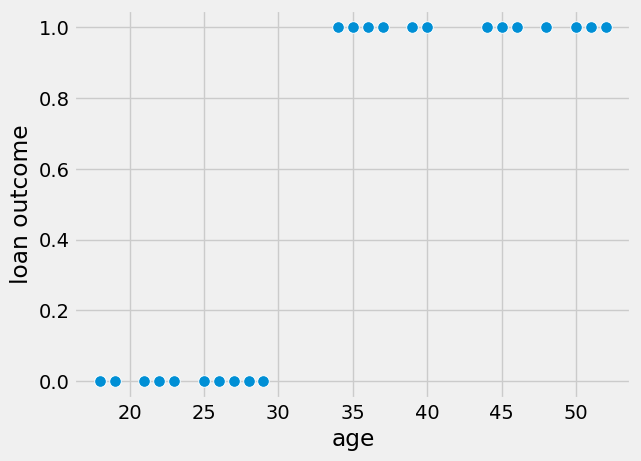

In [1]:
# Importing Libraries...
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
from sklearn.datasets import make_classification
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')


# Creating a dataset
age=[22,25,37,36,46,50,52,51,18,28,27,29,39,45,48,19,18,21,26,34,35,40,44,23]
loan_outcome = [0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0]
data = pd.DataFrame({'age':age, 'loan outcome':loan_outcome})

sns.scatterplot(x=data.age, y=data['loan outcome'], s=70); plt.show()

**Plotting a Linear regression on it.**

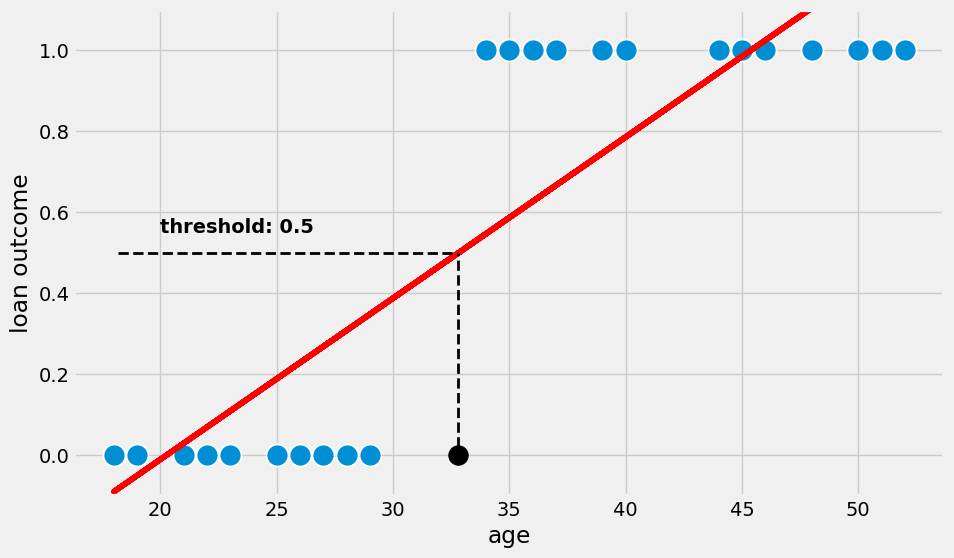

In [2]:
# Plotting the figure
plt.figure(figsize=(10,6))
sns.scatterplot(x=data.age, y=data['loan outcome'], s=250)
m=sum((data.age-data.age.mean())*(data['loan outcome'] - data['loan outcome'].mean()))/sum((data.age-data.age.mean())**2) # Slope
b=data['loan outcome'].mean()-(m*data.age.mean()) # Intercept
line = (m * data.age) + b
plt.plot(data.age, line, c='red')
plt.axhline(y=0.5, ls='--', color='black', linewidth=2, xmax=0.44, xmin=0.05)
plt.axvline(x=32.8, ls='--', color='black', linewidth=2, ymax=0.50, ymin=0.1)
plt.text(x=20, y=0.55, s='threshold: 0.5', color='k', alpha=1, weight='bold')
plt.scatter(x=32.8,y=0,s=200,color='k')
plt.ylim(-0.1,1.1)
plt.show()

<div class="alert alert-block alert-warning"> <h4>📌 Note : </h4>
<div>
<p> Assume we have information about Age and loan outcome. Because this is a classification issue, we can see that all the values will fall between 0 and 1. And, by fitting the best-found regression line and assuming a threshold of 0.5, we can do a very good job with the line.</p>
<p>We can choose a point on the x-axis from which all values on the left side are regarded as negative, and all values on the right side are considered positive.</p>
</div>    
</div>

<h4 style="font-family:serif"><b>But what if the data contains an outlier? Things would become shambles. For 0.5 thresholds</b></h4>

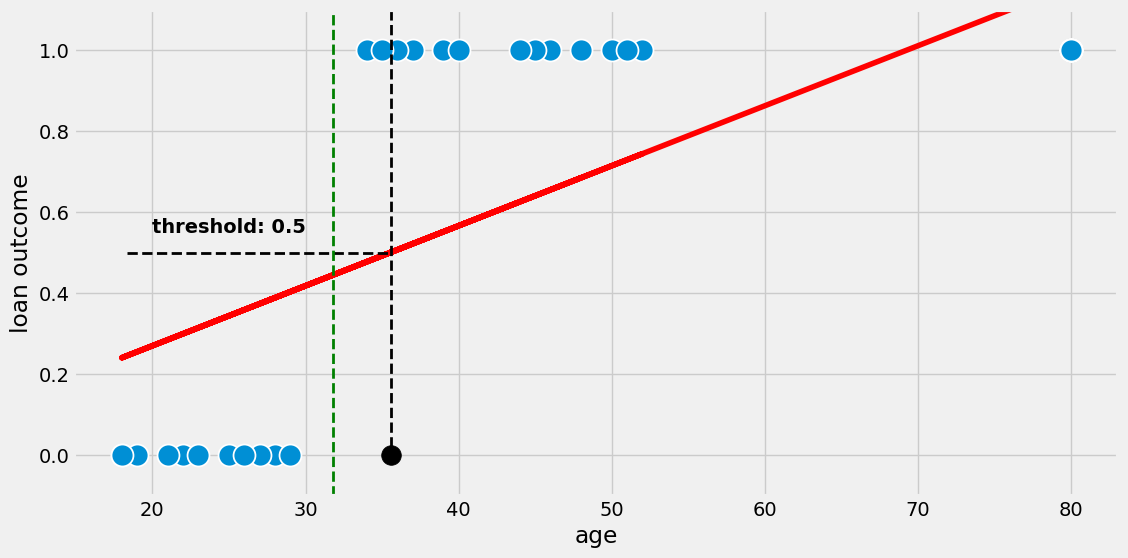

In [3]:
# Creating a dataset
age=[22,25,37,36,46,50,52,51,18,28,27,29,39,45,48,19,18,21,26,34,35,40,44,23,80,80,80,80,80,80,80,80,80,80]
loan_outcome = [0,0,1,1,1,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1]
data = pd.DataFrame({'age':age, 'loan outcome':loan_outcome})

# Plotting the figure
plt.figure(figsize=(12,6))
sns.scatterplot(x=data.age, y=data['loan outcome'], s=250)
m=sum((data.age-data.age.mean())*(data['loan outcome'] - data['loan outcome'].mean()))/sum((data.age-data.age.mean())**2) # Slope
b=data['loan outcome'].mean()-(m*data.age.mean()) # Intercept
line = (m * data.age) + b
plt.plot(data.age, line, c='red')
plt.axhline(y=0.5, ls='--', color='black', linewidth=2, xmax=0.3, xmin=0.05)
plt.axvline(x=31.8, ls='--', color='green', linewidth=2, ymax=1)
plt.axvline(x=35.6, ls='--', color='black', linewidth=2, ymax=1, ymin=0.1)
plt.text(x=20, y=0.55, s='threshold: 0.5', color='k', alpha=1, weight='bold')
plt.scatter(x=35.6,y=0,s=200,color='k')
plt.ylim(-0.1,1.1)
plt.show()

<div class="alert alert-block alert-warning"> <h4>📌 Note : </h4>
<div>
<p>Even if we fit the best-found regression line, we won’t be able to determine any point where we can distinguish classes. It will insert some instances from the positive class into the negative class. The black dotted line (Decision Boundary) separates loan amount and age, however, it should have been a green dotted line that clearly separates the positive and negative cases. As a result, even a single outlier can throw the linear regression estimates off. And it’s here that logistic regression comes into play.</p>
</div>    
</div>

<center><h2><span style="font-family:cursive; color:#197954;">Assumptions of Logistic Regression</span></h2></center>  


The Logistic Regression model requires several key assumptions. These are as follows:-

1. Logistic Regression model requires the dependent variable to be qualitative (binary, multinomial or ordinal) in nature.

2. It requires the observations to be independent of each other. So, the observations should not come from repeated measurements.

3. Logistic Regression algorithm requires little or no multicollinearity among the independent variables. It means that the independent variables should not be too highly correlated with each other.

4. Logistic Regression model assumes linearity of independent variables and log odds.

5. The success of Logistic Regression model depends on the sample sizes. Typically, it requires a large sample size to achieve the high accuracy.

<center><h2><span style="font-family:cursive; color:#197954;">Sigmoid Function</span></h2></center>  


<p>Sigmoid function produces an S-shaped curve. It always returns a probability value between 0 and 1. The Sigmoid function is used to convert expected values to probabilities. The function converts any real number into a number between 0 and 1. In machine learning, sigmoid function is used to map predictions to probabilities.  We utilize sigmoid to translate predictions to probabilities in machine learning.

Mathematically sigmoid function can be,</p>
$$\large \hat{y_i} = {1 \over 1 + \exp^{ - (z) }} $$ 
where, <br>
$z = w_0 + w_1x_1 + w_2x_2 + . . .  + w_nx_n$ <br>
$w = \text{weights}$<br>
$x_1, x_2, ... = \text{independent variables}$

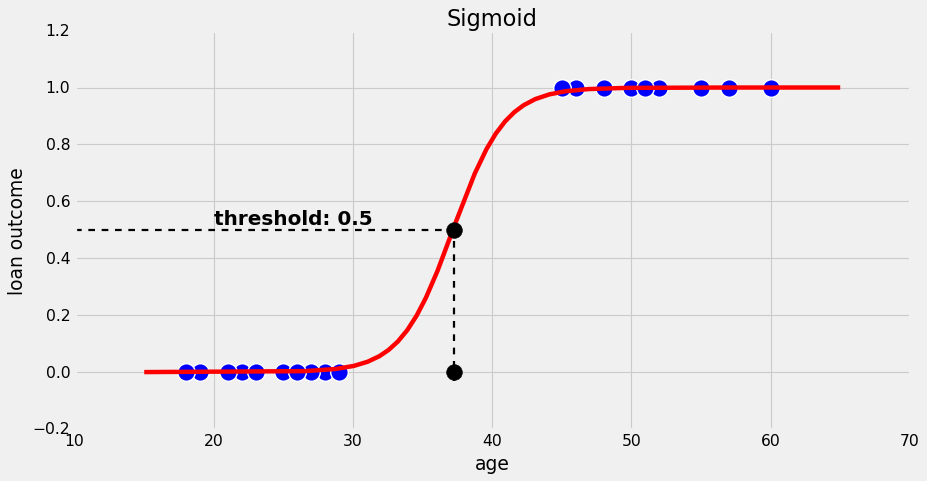

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,6))
# Simulate some data
np.random.seed(0)
age=np.array([22,25,46,50,52,51,18,28,27,29,45,48,19,18,21,26,23, 55,57, 60])
loan_outcome = np.array([0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0, 1,1,1])

# Reshape the data for the logistic regression model
age_reshaped = age.reshape(-1, 1)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(age_reshaped, loan_outcome)

# Create a range of ages for the smooth curve
age_range = np.linspace(15, 65, 300).reshape(-1, 1)
loan_prob = model.predict_proba(age_range)[:, 1]

# Plot the data points
sns.scatterplot(x=age, y=loan_outcome, s=250)

# Plot the logistic regression curve
plt.plot(age_range, loan_prob, color='red')

# Add threshold and decision boundary (at 0.5 probability)
decision_boundary_age = age_range[np.abs(loan_prob - 0.5).argmin()][0]
plt.axhline(y=0.5, ls='--', color='black', linewidth=2, xmax=0.45, xmin=0.0)
plt.axvline(x=decision_boundary_age, ls='--', color='black', linewidth=2, ymax=0.5, ymin=0.12)
plt.scatter(37.25, 0.0, color='black', zorder=5, s = 200)

# Highlight the point on the curve where threshold equals 0.5
plt.scatter(decision_boundary_age, 0.5, color='black', zorder=5, s = 200)
plt.text(20, 0.52, f'threshold: 0.5', fontsize=18, alpha=1, weight='bold')

# Labels and title
plt.xlabel('age')
plt.ylabel('loan outcome')
plt.title('Sigmoid')

# Show the plot
plt.show()

<center><h2><span style="font-family:cursive; color:#197954;"> Decision boundary </span></h2></center>

The sigmoid function returns a probability value between 0 and 1. This probability value is then mapped to a discrete class which is either “0” or “1”. In order to map this probability value to a discrete class (pass/fail, yes/no, true/false), we select a threshold value. This threshold value is called Decision boundary. Above this threshold value, we will map the probability values into class 1 and below which we will map values into class 0.

Mathematically, it can be expressed as follows:-

p ≥ 0.5 => class = 1

p < 0.5 => class = 0 

Generally, the decision boundary is set to 0.5. So, if the probability value is 0.8 (> 0.5), we will map this observation to class 1. Similarly, if the probability value is 0.2 (< 0.5), we will map this observation to class 0. This is represented in the graph below-

![Decision boundary in sigmoid function](https://ml-cheatsheet.readthedocs.io/en/latest/_images/logistic_regression_sigmoid_w_threshold.png)

<center><h2><span style="font-family:cursive; color:#197954;">Cost Function</span></h2></center>  

<p> What is cost function? Cost functions are used in machine learning to estimate how poorly models perform. Simply put, a cost function is a measure of how inaccurate the model is in estimating the connection between X and Y. This is usually stated as a difference or separation between the expected and actual values. A machine learning model’s goal is to discover parameters, weights, or a structure 
that minimizes the cost function </p>

 $$\textrm{cost function}, J(data, w) = (-1/m)\sum\limits_{i=1}^{m} y_i \log (\hat{y_i}) + (1-y_i) \log(1-\hat{y_i}) $$

Linear regression employs the Least Squared Error as the loss function, which results in a convex network, which we can then optimize by identifying the vertex as the global minimum. For logistic regression, however, it is no longer a possibility. Because the hypothesis has been modified, calculating Least Squared Error using the sigmoid function on raw model output will result in a non-convex graph with local minimums.


![Cost funtion (convex and non-convex)](https://editor.analyticsvidhya.com/uploads/3177511.png)

<center><h2><span style="font-family:cursive; color:#197954;">Derivative of cost function</span></h2></center>  

$$\textrm{derivative  } (cost function)_j \text{ }, \frac {\delta \text{ } J(data, w)}{\delta w} = \frac{1}{m} \times \sum\limits_{i=1}^{m} (\hat{y}-y^i)x^i_j $$
<h4 style="font-family:serif"><b>Updating the weights using:  </b></h4> 

$$w_{new} = w_{old} + \eta * derivative(cost function)$$

$$w_{new} = w_{old} + \eta \times \frac{1}{m} \times \sum\limits_{i=1}^{m} (\hat{y}-y^i)x^i_j$$

where, 
$\eta = \text{learning  rate}$ <br>
$m = \text {no. of samples}$

![Separating the classes with gradient descent](https://user-images.githubusercontent.com/59618586/116012986-f5a67c80-a62d-11eb-8666-bc90e8e1bf02.gif)

<center><h2><span style="font-family:cursive; color:#197954;">Describing the Performance of a Logistic model</span></h2></center>  

A **confusion matrix** is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.Let us look at some of the important terms of confusion matrix. 


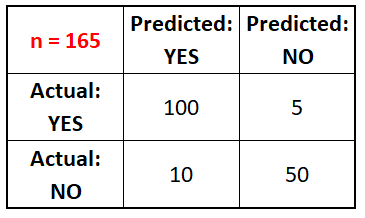

confusion matrix whether employees will leave a company or not

### The Confusion Matrix tells us the following:

* There are two possible predicted classes: “yes” and “no”. If we were predicting that employees would leave an organisation, for example, “yes” would mean they will, and “no” would mean they won’t leave the organisation.
* The classifier made a total of 165 predictions (e.g., 165 employees were being studied).
* Out of those 165 cases, the classifier predicted “yes” 110 times, and “no” 55 times.
* In reality, 105 employees in the sample leave the organisation, and 60 do not.


### Basic terms related to Confusion matrix:

* **True positives (TP)**: These are cases in which we predicted yes (employees will leave the organisation), and employees actually leave i.e 100
* **True negatives (TN)**: We predicted no(employees will not leave the organisation) and they don’t leave i.e 50
* **False positives (FP)**: We predicted yes they will leave, but they don’t leave. (Also known as a “Type I error.”) i.e 10
* **False negatives (FN)**: We predicted no they will not leave, but they actually leave (Also known as a “Type II error.”) i.e 5

### Evaluating a Classification Model

* **Accuracy** : (TP+TN)/Total . Describes overall, how often the classifier correct. i.e 100+50/165,
<p>Measures of Accuracy 

$$\textrm{Accuracy} = \frac {\textrm{True Positives + True Negative}} {\textrm{Total}}$$
Sensitivity and specificity are statistical measures of the performance of a binary classification test:

* **Sensitivity/Recall/True Positive Rate** = TP/(TP + FN). When it’s actually yes, how often does it predict yes? i.e 100/(100+5)
$$ \textrm{Recall or TPR} = \frac {\textrm{True Positives}} {\textrm{True Positives} + \textrm{False Negatives}} $$
* **Specificity** = TN/(TN + FP).When it’s actually no, how often does it predict no?? i.e 50/(50+10)
$$\textrm{Specificity} = \frac{\textrm{True Negative}}{\textrm{False Positives} + \textrm{True Negative}}$$ 
* **Precision** = TP/predicted yes. When it predicts yes, how often is it correct? **Precision** measures the accuracy of positive predictions i.e., 100/(10+100) $$\textrm{Precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$
* **False Positive Rate** = 1 - Specificity or FP/predicted No. $$\textrm{FPR} = \frac{\textrm{False Positives}}{\textrm{False Positives} + \textrm{True Negative}}$$  **Precision** measures the accuracy of positive predictions i.e., 100/(10+100) $$\textrm{Precision} = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$ 
* **F1 Score**: F1 score is a machine learning evaluation metric that measures a model’s accuracy. It combines the precision and recall scores of a model. The accuracy metric computes how many times a model made a correct prediction across the entire dataset. This can be a reliable metric only if the dataset is class-balanced; that is, each class of the dataset has the same number of samples.
Nevertheless, real-world datasets are heavily class-imbalanced, often making this metric unviable. For example, if a binary class dataset has 90 and 10 samples in class-1 and class-2, respectively, a model that only predicts “class-1,” regardless of the sample, will still be 90% accurate.
$$ F1 \text{ }Score = \frac {2 \times Precision \times Recall}{Precision + Recall}$$



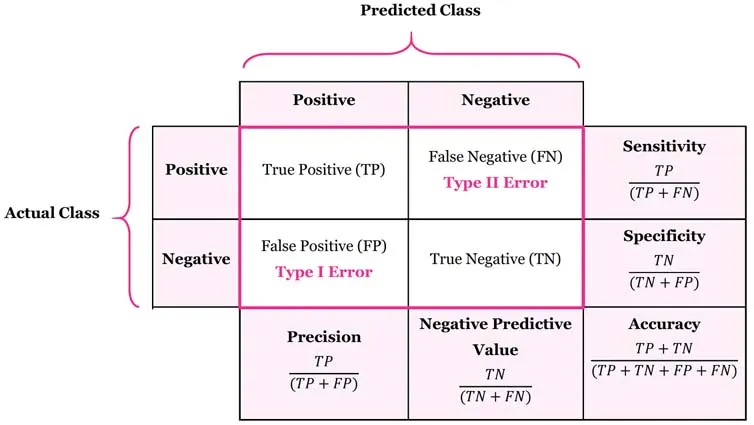

<center><h2><span style="font-family:cursive; color:#197954;">Evaluation metrics for a Classification model’s performance</span></h2></center>  


**ROC curve**

A **ROC(Receiver Operator Characteristic Curve)** can help in deciding the best threshold value. It is generated by plotting the True Positive Rate (y-axis) against the False Positive Rate (x-axis) as you vary the threshold for assigning observations to a given class.ROC curve will always end at (1,1). The threshold at this point will be 0. This means that we will always classify these observations falling into the class 1(Specificity will be 0. False positive rate is 1).

One should select the best threshold for the trade off you want to make. According to the criticality of the business, we need to compare the cost of failing to detect positives vs cost of raising false alarms.

![](https://miro.medium.com/max/469/1*Y65IEOXvxLRKKqWxlQovsg.png)

An animation to demonstrate how an ROC curve relates to sensitivity and specificity for all possible cutoffs.

![ROC AUC animation](https://github.com/dariyasydykova/open_projects/blob/master/ROC_animation/animations/ROC.gif?raw=true)

**High Threshold:**
* High specificity
* Low sensitivity


**Low Threshold**
* Low specificity
* High sensitivity



As stated in the introduction, one very common way of assessing the usefulness of a binary classifier is the ROC curve as well as the area under the ROC curve (AUC). The ROC curve is a simple plot that shows the tradeoff between the true positive rate and the false positive rate of a classifier for various choices of the probability threshold. Before we get started on building our own ROC curve and assessing the quality of our logistic regression model, let's take a look at an example borrowed from the University of Nebraska Medical Center's website [here](http://gim.unmc.edu/dxtests/roc3.htm).

![ROC Curve](http://gim.unmc.edu/dxtests/roccomp.jpg)



Here we see three ROC curves that are labelled as 'Excellent', 'Good', and 'Worthless'. These represent the results of three different classifiers of various usefulness. The x-axis show the false positive rate (FPR) from 0 to 1 and the y-axis shows the true positive rate (TPR) from 0 to 1. The plotted lines show, for various cutpoints or choices of threshold, what the these rates are. The closer the curve gets to the top left corner the better the classifier. Notice that a perfect classifier would yield a true positive rate of 1 and a false positive rate of 0. In such an ideal case, the ROC curve would be a straight line from (0,0) to (0,1) and a horizontal line from (0,1) to (1,1). This is why the area under the curve is used as a singular measure for assessing the usefulness of a classifier. For a perfect classifier the area under the ROC curve would be 1:

$$1 TPR \times 1 FPR$$

Notice that blue classifer labeled 'worthless'. It is essentially the 45 degree line or the line that starts at (0,0) and has slope 1. This classifier has an area under curve of 0.5 and is considered not of use because it is no better than random guessing. If our curve goes under the 45 degree line (i.e. the AUC is less than 0.5) then we know we've done something wrong because then our model would perform worse than random guessing!

That's the general idea. Let's build our own ROC curve for our predictions for the Porto competition that we just generated. The first thing that we need to do is determine how many cutpoints that we want to use. I'll keep this small in number for sake of example. Because our predictions range from 0 to 0.54, we'll select cut points within this range. Here I am choosing thresholds of 0.3, 0.2, 0.1, 0.05, 0.04, 0.03, 0.02, and  0.01. Fore each one of these cut points were are going to classify everything above the cut point as the positive class (1 in this case) and everything below as the negative class (0 in this case). Here I do so, putting the results into a dataframe. 

<center><h2><span style="font-family:cursive; color:#197954;">Coding Logistic Regression from scratch</span></h2></center>  


<h3 style="font-family:serif">Creating a new data using sklearn</h3>

In [23]:
#| code-fold: false
x, y = make_classification(n_samples=190, n_features=2, n_informative=1,
n_redundant=0,n_classes=2, n_clusters_per_class=1, 
random_state=41,hypercube=False,class_sep=15)
data = pd.DataFrame({'feature1':x[:,0], 'feature2':x[:,1], 'target':y})

data.head()

,feature1,feature2,target
0,-2.117250,1.634932,0
1,-2.944382,-0.725987,0
2,0.512849,0.431757,1
3,0.791268,-1.092766,1
4,-2.141477,-1.008062,0


<h3 style="font-family:serif">Plotting the data</h3>

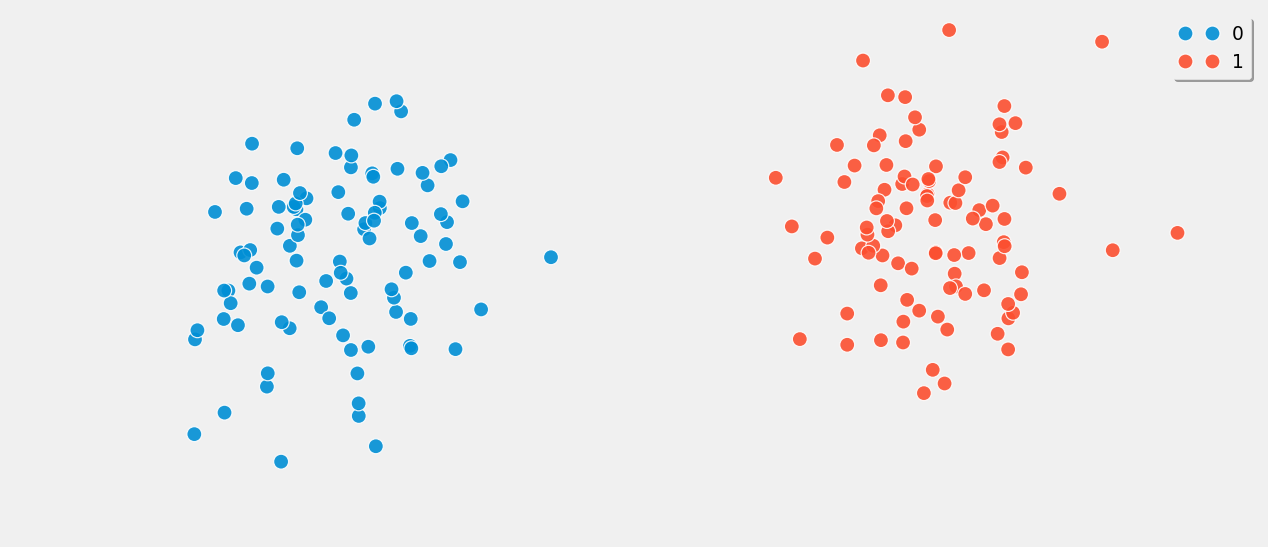

In [24]:
#| code-fold: false

plt.figure(figsize=(18,8))
sns.scatterplot(x=data.feature1, y=data.feature2, hue=data.target,
               s=180, alpha=0.9)
plt.xticks(ticks=[])
plt.xlabel(xlabel=None)
plt.yticks(ticks=[])
plt.ylabel(ylabel=None)
plt.legend(shadow=True)
plt.show()

<h3 style="font-family:serif">Logistic Regression algorithm using gradient descent</h3>

In [25]:
#| code-fold: false


# Sigmoid function
def sigmoid(z):
    return 1/(1 + np.exp(-z))

# Gradient descent
def gradient_descent(x, y):
    # Inserting new col with ones for intercept(w0)
    x = np.insert(x, 0, 1, axis=1)
    # initial weights
    weights = np.ones(x.shape[1])
    # learning rate
    lr = 0.5
    
    for i in range(5000):
        # predictions
        y_hat = sigmoid(np.dot(x, weights))
        
        # updating the weights using gradient descent
        weights = weights + lr * (np.dot((y - y_hat), x) / x.shape[0])
        
    return weights[1:], weights[0]
        

<h3 style="font-family:serif">Getting slope and Y-intercept</h3>

In [26]:
#| code-fold: false

coef_,intercept_ = gradient_descent(x,y)
# Slope
m = -(coef_[0]/coef_[1])
# Y-intercept
b = -(intercept_/coef_[1])
print(f'Slope: {m}')
print(f'intercept: {b}')

Slope: -31.804515498492844
intercept: -27.631576394876497


<h3 style="font-family:serif">Plotting decision boundary</h3>

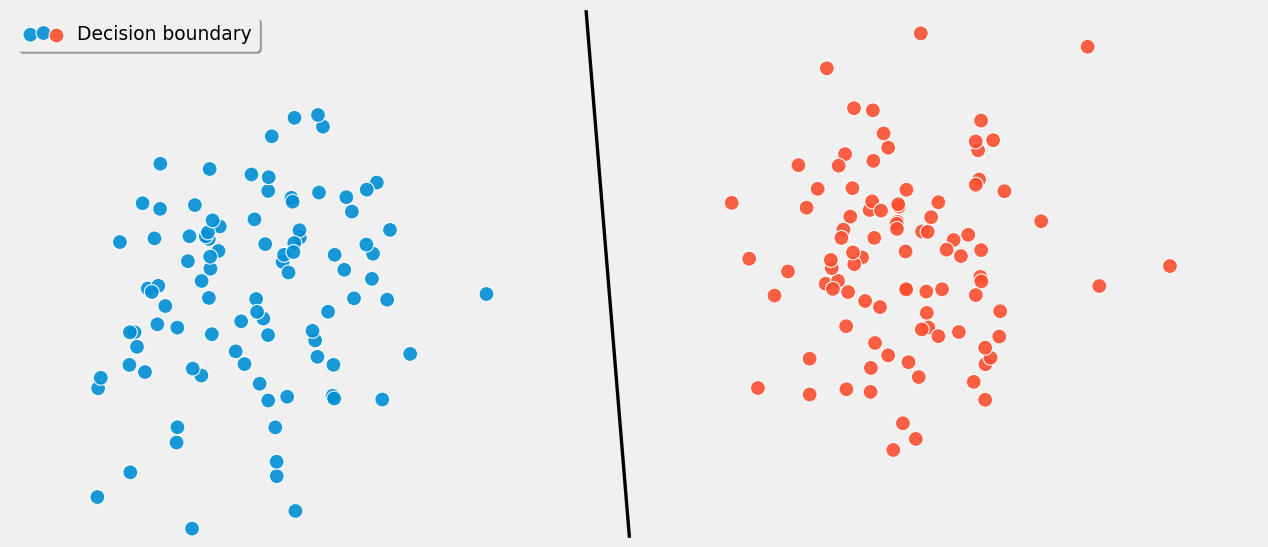

In [27]:
#| code-fold: false

plt.figure(figsize=(18, 8))
sns.scatterplot(x=data.feature1, y=data.feature2, hue=data.target,
               s=180, alpha=0.9)

# Decision boundary
x_input = np.linspace(-1, 1, 10)
y_input = m * x_input + b
plt.plot(x_input, y_input, color='black', linewidth=3, label='Decision boundary')

plt.xticks(ticks=[])
plt.xlabel(xlabel=None)
plt.yticks(ticks=[])
plt.ylabel(ylabel=None)
plt.legend(labels=['Decision boundary'], shadow=True, loc=2)
plt.xlim(-3.5,2)
plt.ylim(-3.1,3)
plt.show()

<div class="alert alert-block alert-warning"> <h4>📌 Note : </h4>
<div>
<p>The goal of the logistic regression algorithm is to create a linear decision boundary separating two classes from one another. </p>
</div>    
</div>